In [3]:
import pandas as pd
df=pd.read_csv("/content/comments_cleaned.csv")
df.head()

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
0,0,1,unde at dolorem,2,1,13-04-2023 08:04,April 14,yes,1
1,1,2,quae ea ducimus,3,1,13-04-2023 08:04,April 14,no,2
2,2,3,alias a voluptatum,5,1,13-04-2023 08:04,April 14,no,4
3,3,4,facere suscipit sunt,14,1,13-04-2023 08:04,April 14,yes,2
4,4,5,totam eligendi quaerat,17,1,13-04-2023 08:04,April 14,yes,1


In [4]:
df.tail()

,Unnamed: 0,id,comment,User id,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
7483,7483,7484,accusamus vel est,82,257,13-04-2023 08:04,April 14,no,5
7484,7484,7485,sit nulla qui,91,257,13-04-2023 08:04,April 14,no,6
7485,7485,7486,sed quidem vitae,93,257,13-04-2023 08:04,April 14,yes,2
7486,7486,7487,dolorem eveniet rerum,95,257,13-04-2023 08:04,April 14,yes,1
7487,7487,7488,dolores nihil voluptas,96,257,13-04-2023 08:04,April 14,no,3


In [5]:
import matplotlib.pyplot as plt

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [7]:
df[['User  id','Hashtags used count']]

,User id,Hashtags used count
0,2,1
1,3,2
2,5,4
3,14,2
4,17,1
...,...,...
7483,82,5
7484,91,6
7485,93,2
7486,95,1


In [8]:
len(df['User  id'].unique())

77

In [9]:
df = df.rename(columns={"User  id":"uid"})

<Axes: ylabel='count'>

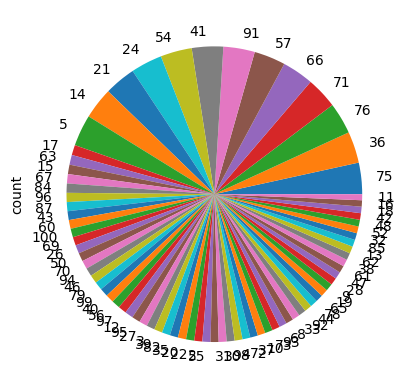

In [10]:
df["uid"].value_counts().plot(kind="pie")

In [11]:
df=df.drop(columns=["Unnamed: 0","id"])

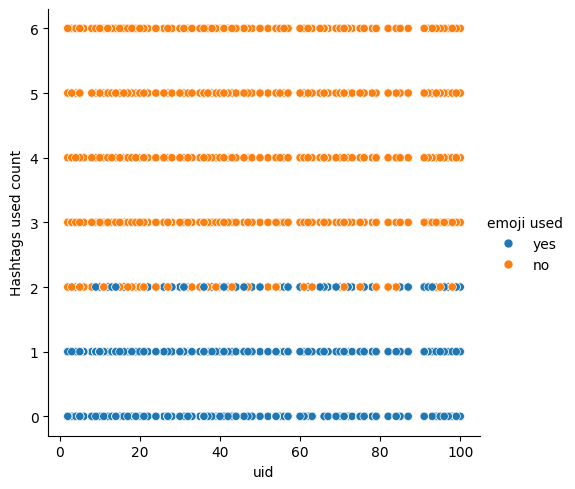

In [12]:
import seaborn as sns
sns.relplot(data=df,x='uid',y='Hashtags used count',hue="emoji used")

In [13]:
df[(df['Hashtags used count']>5) & (df['uid']==11)]

,comment,uid,Photo id,created Timestamp,posted date,emoji used,Hashtags used count
1460,exercitationem doloribus quia,11,51,13-04-2023 08:04,April 14,no,6
1808,possimus ea aliquid,11,63,13-04-2023 08:04,April 14,no,6


In [14]:
df.values

array([['unde at dolorem', 2, 1, ..., 'April 14', 'yes', 1],
       ['quae ea ducimus', 3, 1, ..., 'April 14', 'no', 2],
       ['alias a voluptatum', 5, 1, ..., 'April 14', 'no', 4],
       ...,
       ['sed quidem vitae', 93, 257, ..., 'April 14', 'yes', 2],
       ['dolorem eveniet rerum', 95, 257, ..., 'April 14', 'yes', 1],
       ['dolores nihil voluptas', 96, 257, ..., 'April 14', 'no', 3]],
      dtype=object)

In [21]:
from sklearn.model_selection import train_test_split
X = df["comment"]
y = df["emoji used"]
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.6, random_state = 1)


In [22]:
from sklearn.feature_extraction.text import CountVectorizer
vector = CountVectorizer(stop_words = 'english',lowercase=False)
# fit the vectorizer on the training data
vector.fit(X_train)
print(vector.vocabulary_)
X_transformed = vector.transform(X_train)
X_transformed.toarray()
# for test data
X_test_transformed = vector.transform(X_test)

{'ad': 3, 'ut': 166, 'et': 55, 'odit': 113, 'explicabo': 62, 'placeat': 121, 'molestiae': 95, 'dicta': 34, 'sint': 154, 'quaerat': 127, 'maxime': 91, 'est': 54, 'tenetur': 162, 'accusamus': 1, 'voluptas': 173, 'dolor': 37, 'voluptatem': 175, 'harum': 68, 'tempora': 159, 'earum': 47, 'iusto': 82, 'mollitia': 97, 'sit': 155, 'esse': 53, 'minus': 93, 'omnis': 116, 'praesentium': 124, 'expedita': 61, 'error': 52, 'eos': 51, 'rerum': 148, 'illo': 71, 'sed': 151, 'eum': 56, 'nihil': 104, 'cupiditate': 29, 'quos': 139, 'reprehenderit': 146, 'unde': 165, 'eveniet': 57, 'aliquam': 6, 'consequatur': 22, 'aut': 16, 'doloremque': 40, 'voluptates': 176, 'necessitatibus': 100, 'quia': 132, 'architecto': 11, 'quae': 126, 'enim': 50, 'eius': 48, 'illum': 72, 'dolore': 38, 'repellat': 144, 'labore': 83, 'aliquid': 7, 'officiis': 115, 'atque': 15, 'quasi': 130, 'laudantium': 86, 'pariatur': 118, 'id': 70, 'incidunt': 74, 'repellendus': 145, 'inventore': 75, 'optio': 117, 'occaecati': 111, 'ex': 58, 'vel

In [23]:
from sklearn.naive_bayes import MultinomialNB
naivebayes = MultinomialNB()
naivebayes.fit(X_transformed, y_train)

MultinomialNB()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(naivebayes.predict(X_test_transformed), y_test))

              precision    recall  f1-score   support

          no       0.49      0.50      0.49      1468
         yes       0.51      0.49      0.50      1528

    accuracy                           0.50      2996
   macro avg       0.50      0.50      0.50      2996
weighted avg       0.50      0.50      0.50      2996



In [25]:
review1 = ['''unde at dolorem''']
vec = vector.transform(review1).toarray()
print('Headline:', review1)
print(str(list(naivebayes.predict(vec))[0]).replace('0', 'NEGATIVE').replace('1', 'POSITIVE'))
#naivebayes.predict(vec)[0]

Headline: ['unde at dolorem']
no


In [26]:
import pickle

saved_model = pickle.dumps(naivebayes)

In [27]:
s = pickle.loads(saved_model)

In [28]:
review2 = ['The app is really good']
vec = vector.transform(review2).toarray()

s.predict(vec)[0]

'yes'